# Exective summary of Work Package 1

## Objectives

This work package aims at developing methods for cleaning and preprocessing the data, and select the most relevant features for further model development.

## Tasks

- Task 1: Read and understand the data
  - Understand how to use the provided utility function to read the data
  - Understand the data structure and the meaning of each column
- Task 2: Clean and preprocess the data
  - Explore the quality of the data
  - Develop methods to remove the outlier and clean the data
- Task 3: Feature engineering
  - Visualize the data
  - Develop methods to select the most relevant features

## Delierables

- A Jupyter notebook reporting the process and results of the above tasks


# Before starting, please:
- Fetch the most up-to-date version of the github repository.
- Create a new branch called "WP2_TD_Lect_5_YourName", based on the branch "zhiguo_dev" and switch to it.
- Copy the notebook WP2_DATA-DRIVEN FAULT DETECTION/support/WP2_TD_Lect_5 to WP2_DATA-DRIVEN FAULT DETECTION/TD_5/, and rename it to TD_Lect_5_YourName.ipynb
- After finishing this task, push your changes to your github repository.
- Submit a pull request to the "zhiguo_dev" branch.

# Task 1 Read and understand the data

## Sub-task 1: Read the data from the different csv files and store it in a dataframe. 

The training data is stored in the following path: `projects\maintenance_industry_4_2024\dataset\training_data`. In this folder, there are some subfolders. Each subfolder contains the data of one test. The name of the subfolder tells you the time when the test is performed. Inside each subfolder, there are six csv files, each file corresponds to the data from one motor. The file `Test condition.xlsx` tells you the test condition for each test.

In `utility.py`, there are supporting functions `read_all_csvs_one_test` and `read_all_test_data_from_path`. Please have a look at the demo in `demo_read_data_and_preprocess.ipynb`, and use these supporting functions to read the data.


**Your task:**

- Create a dataframe to store data from all the test.
- Write a paragraph to explain the structure of the resulted dataframe (what does each column represent?)

In [1]:
# Your code here.


import numpy as np
import pandas as pd
from utility import read_all_csvs_one_test
from utility import read_all_test_data_from_path

20240105_164214: 0    Robot not moving, just starting up.
Name: Description, dtype: object



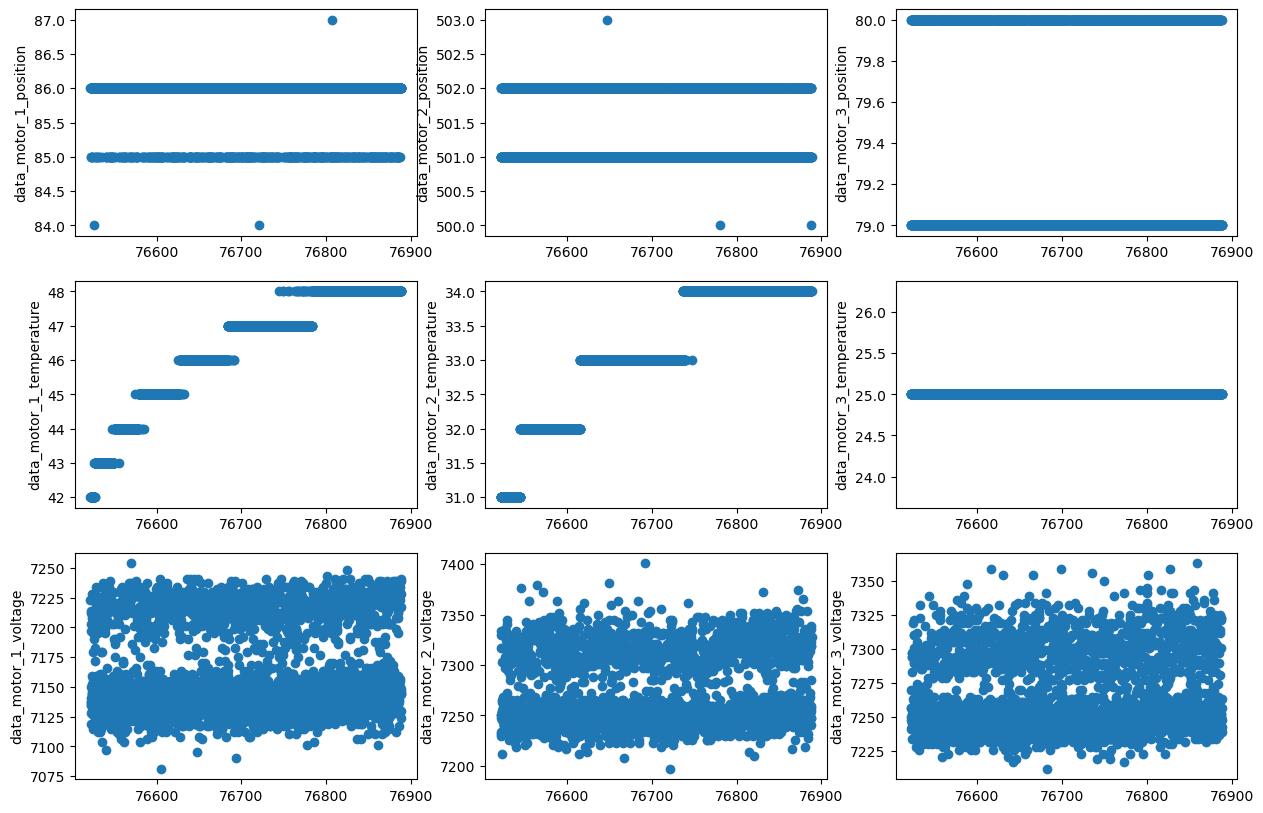

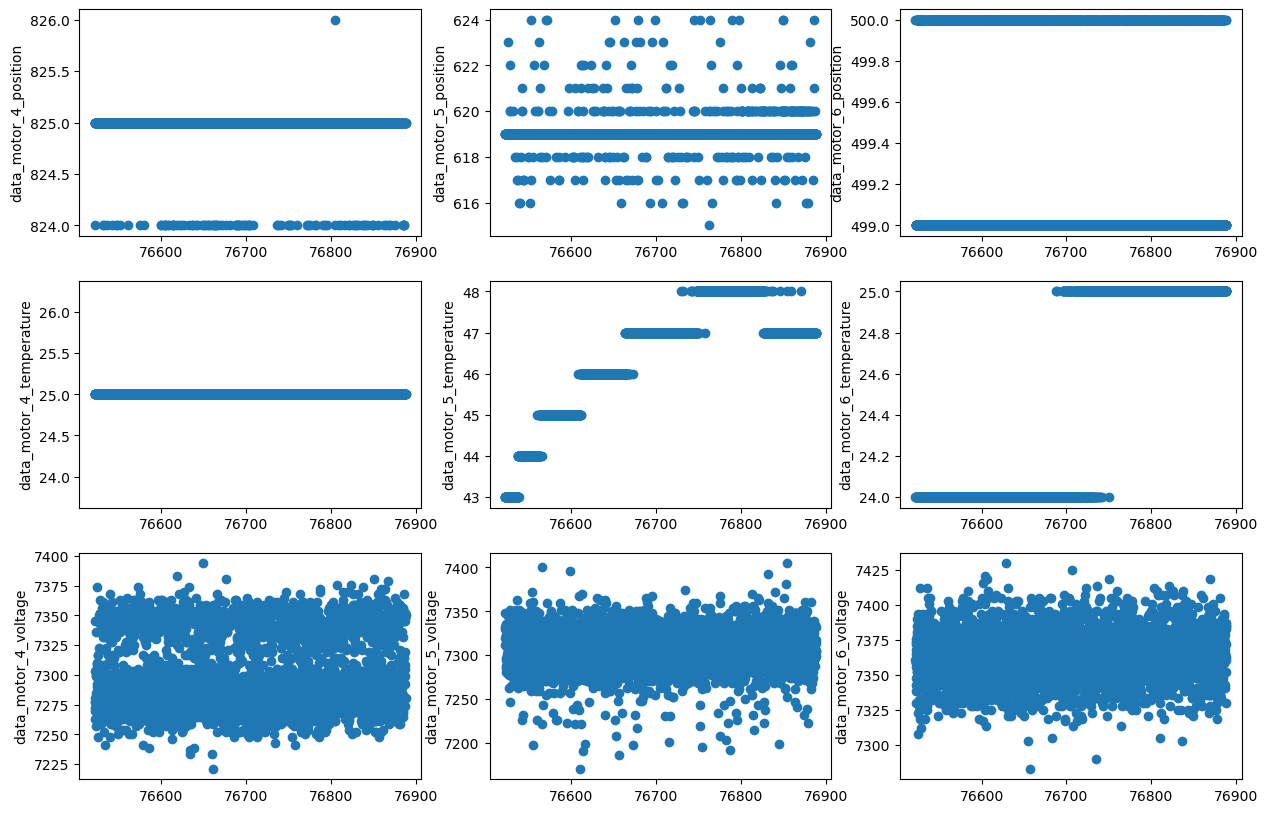

20240105_165300: 1    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



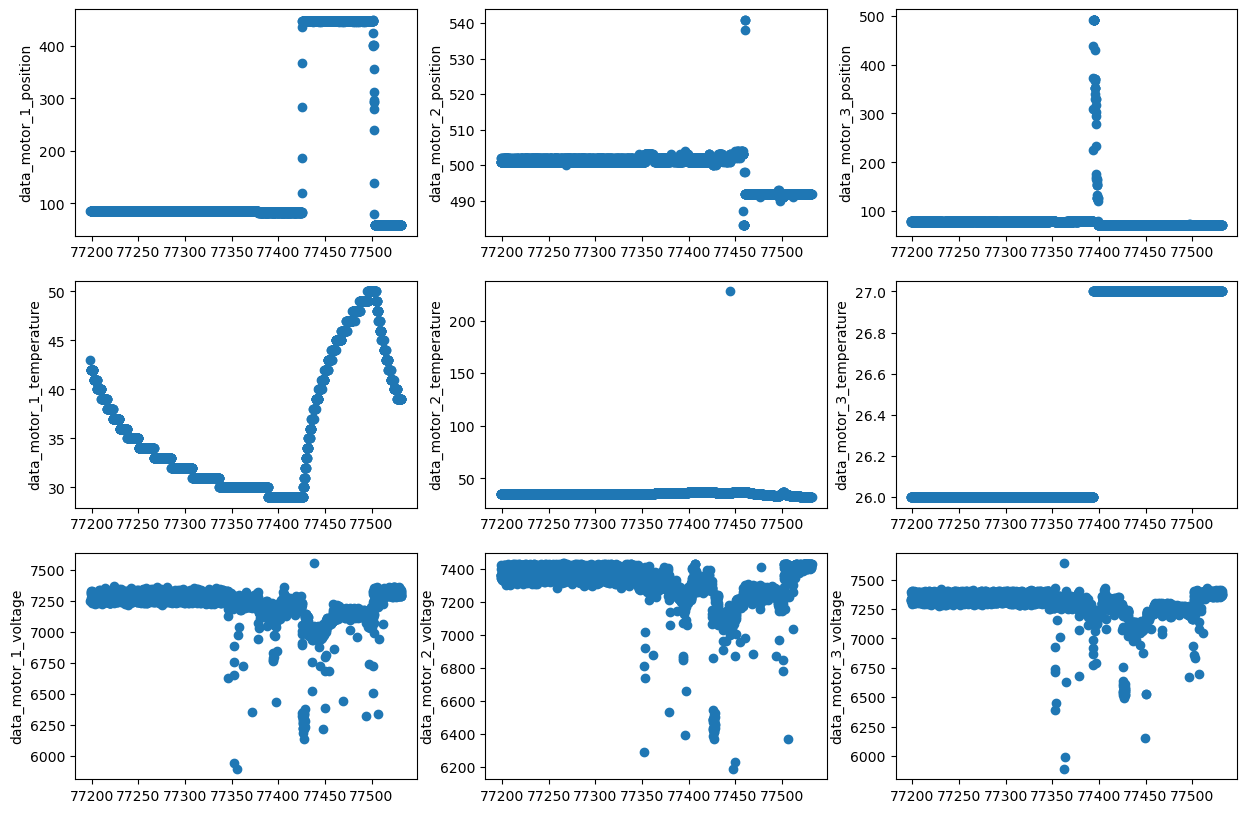

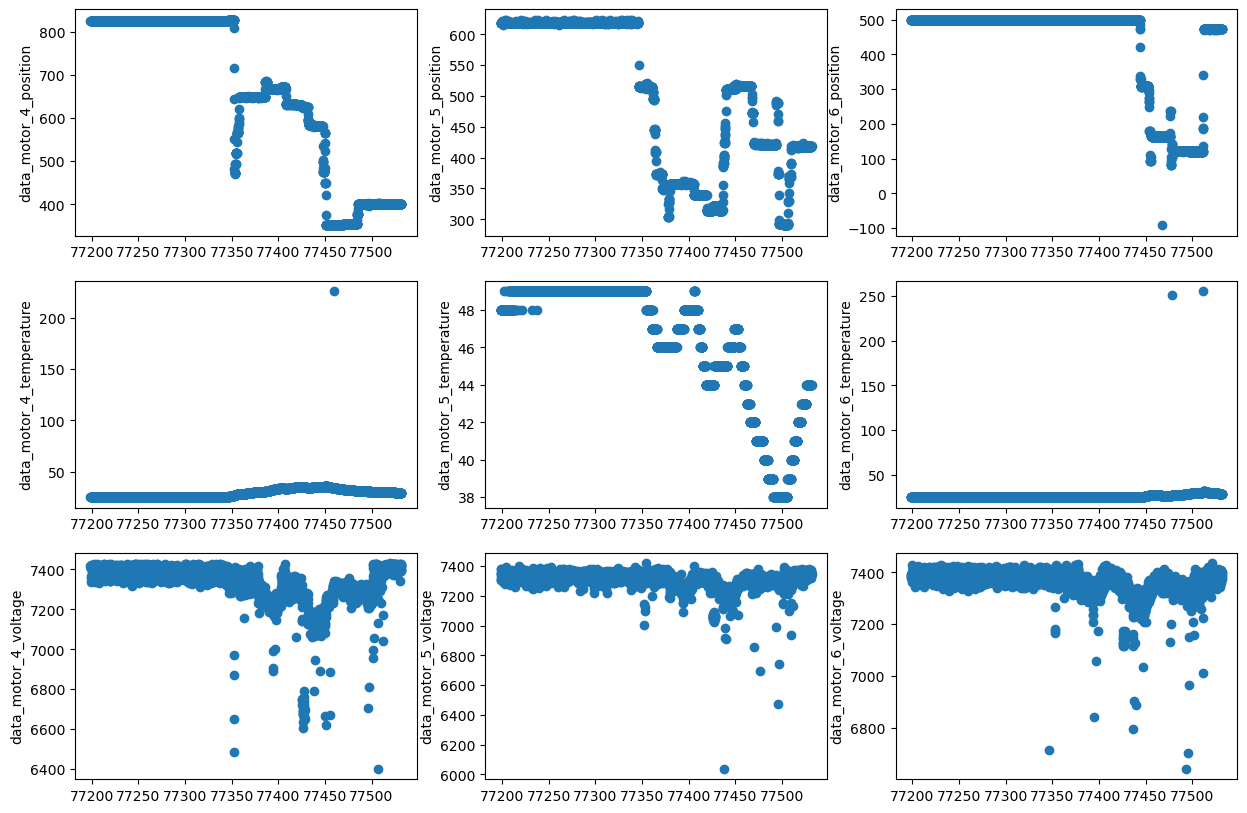

20240105_165972: 2    Not moving. After the operation.
Name: Description, dtype: object



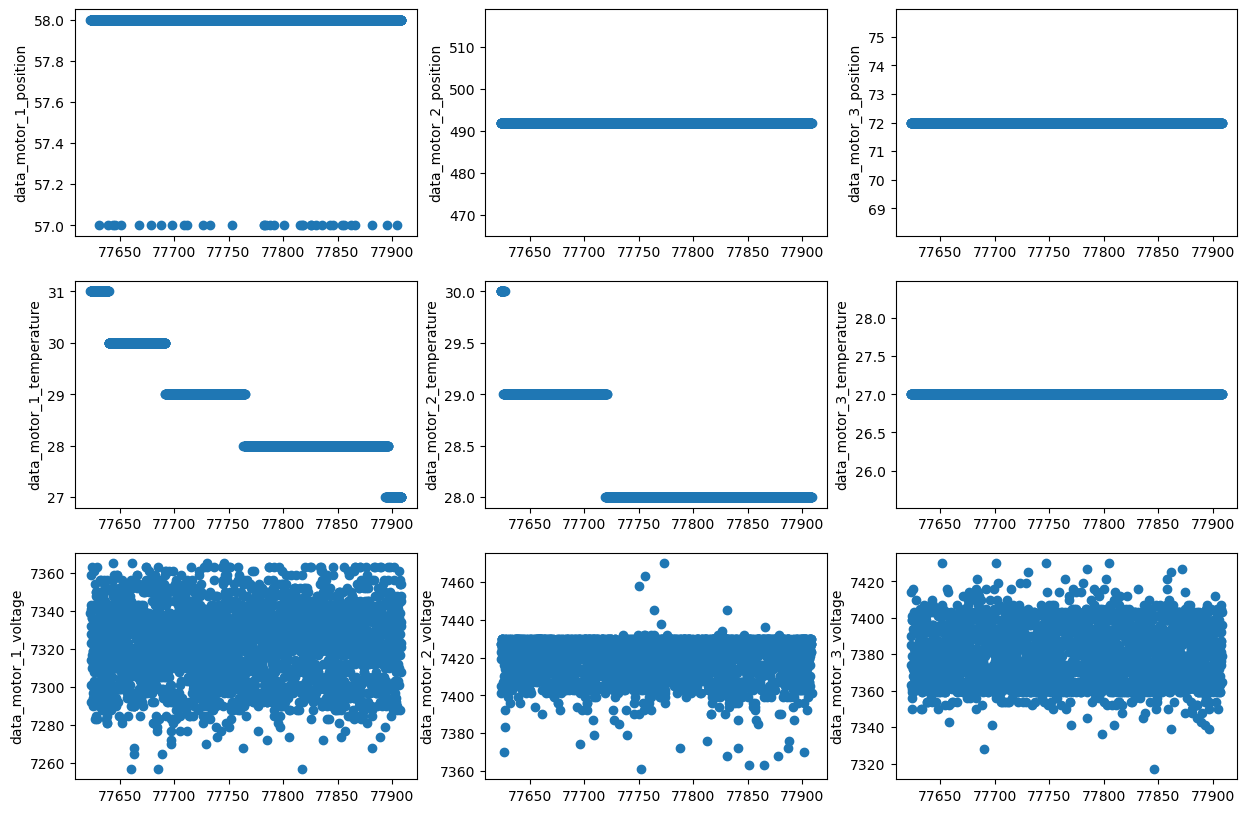

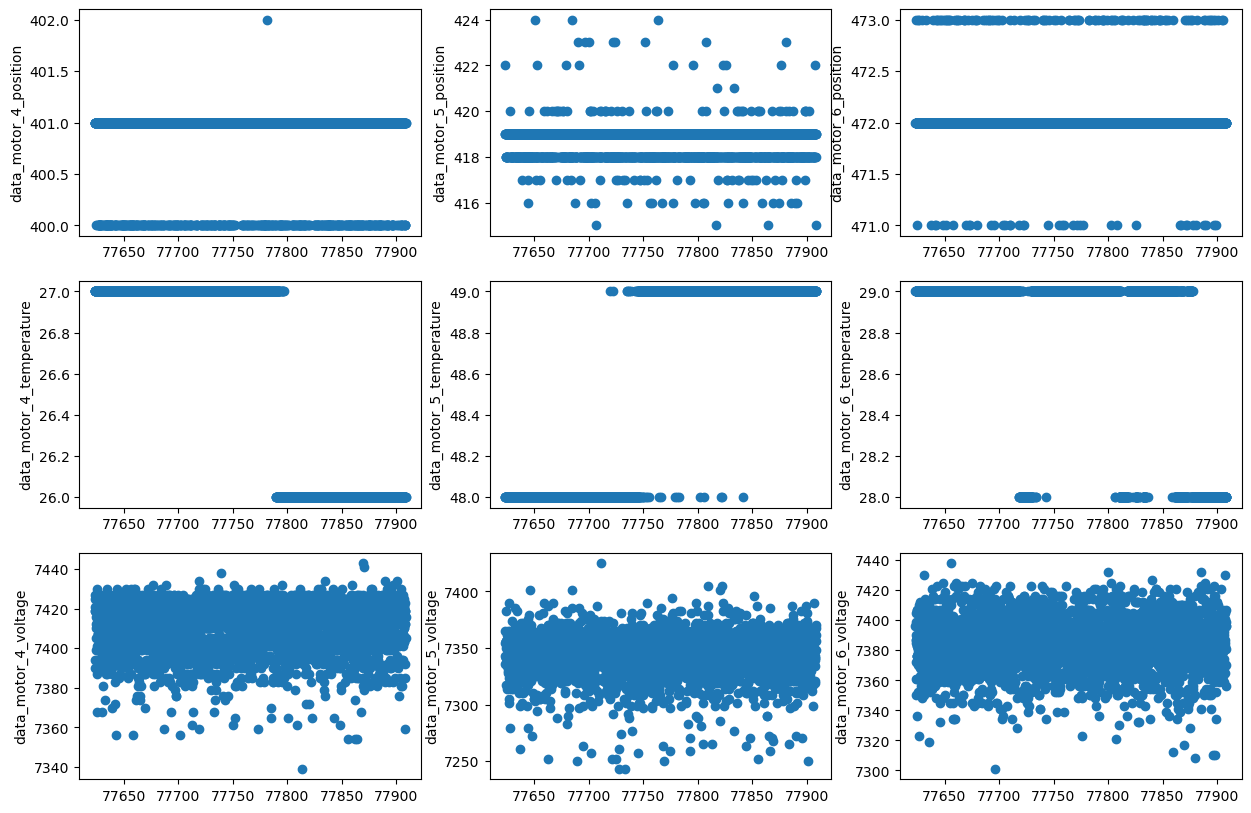

20240320_152031: 3    Robot not moving, just starting up.
Name: Description, dtype: object



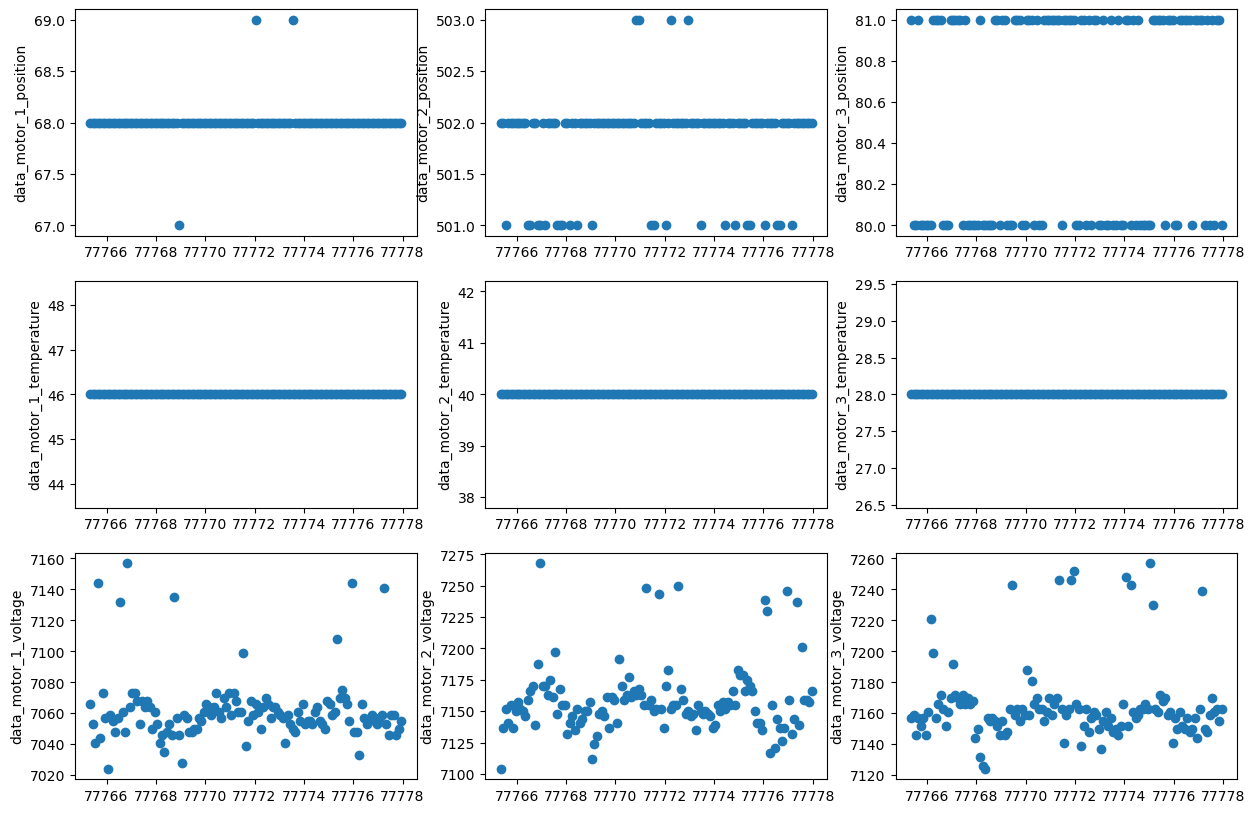

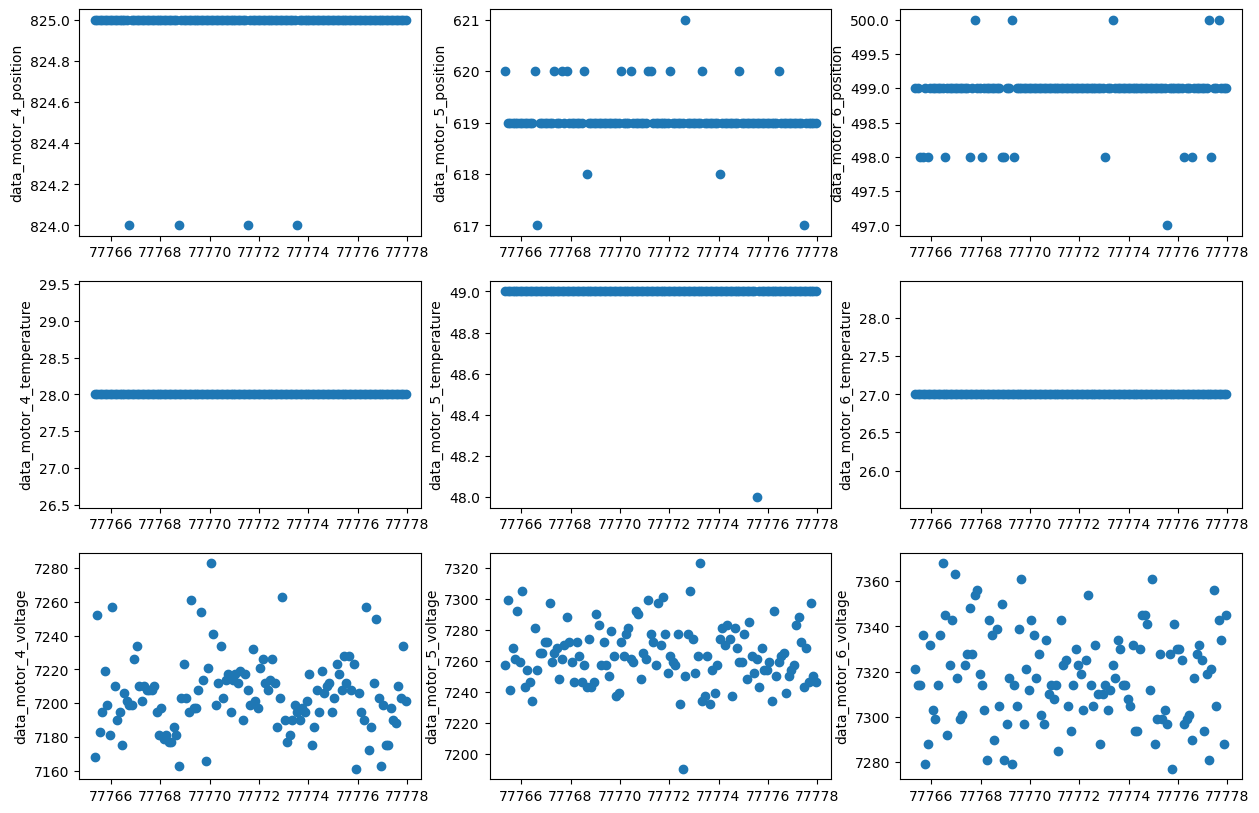

20240320_153841: 4    Not moving. Move motor 6 -> motor 1 sequentially.
Name: Description, dtype: object



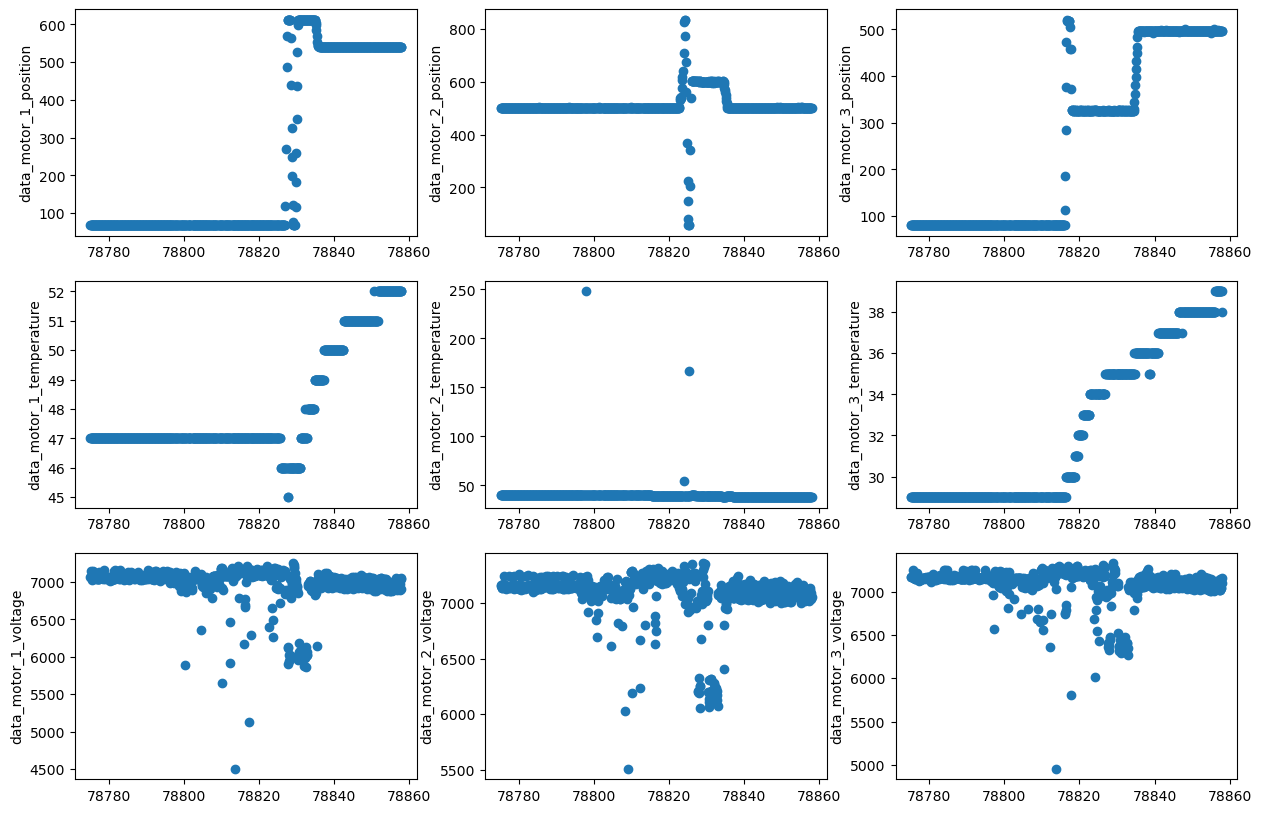

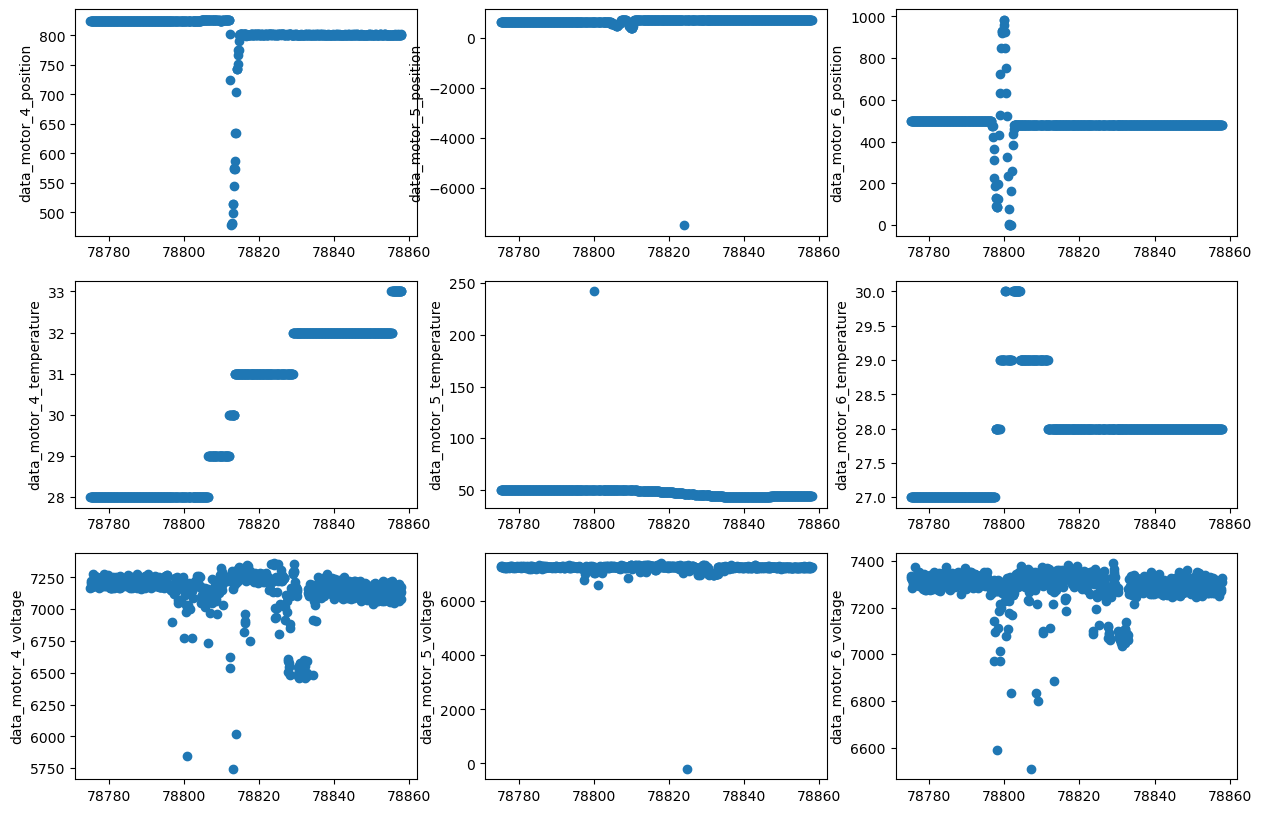

20240320_155664: 5    Robot not moving.
Name: Description, dtype: object



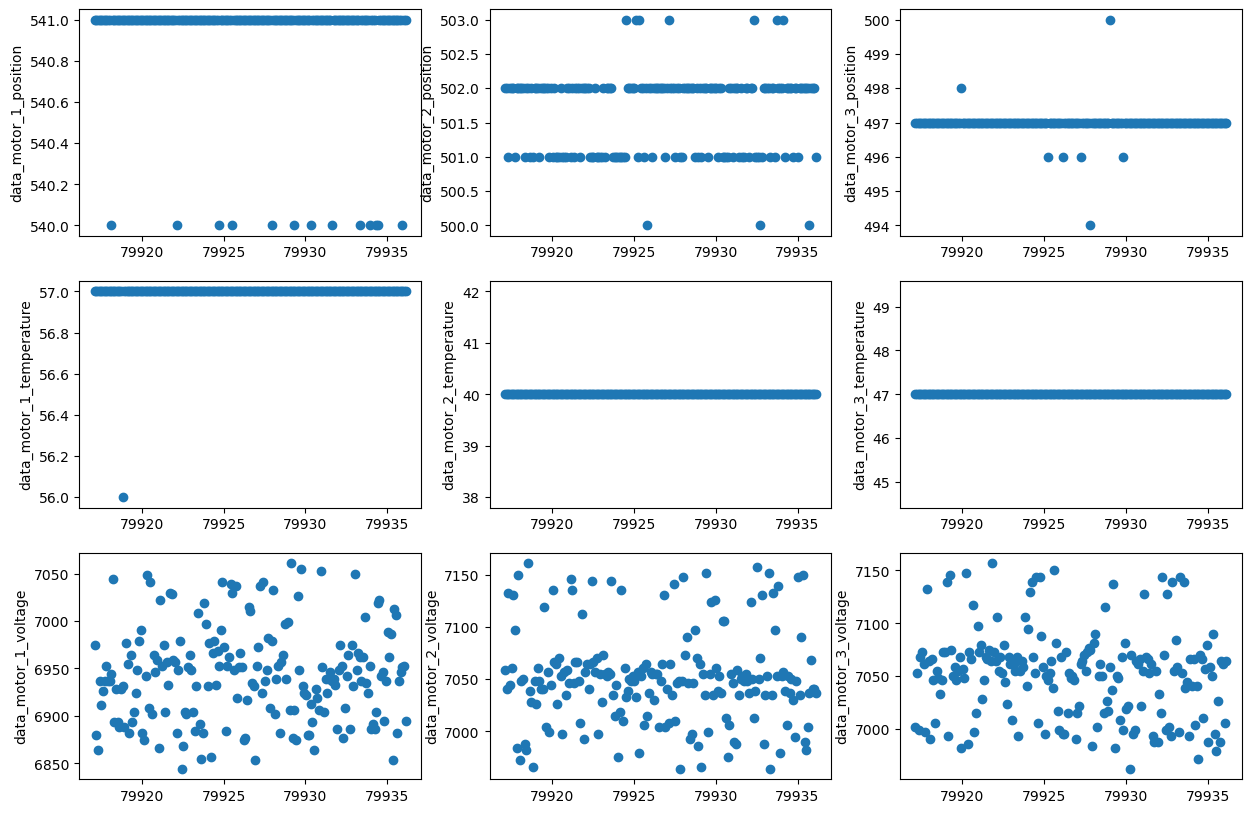

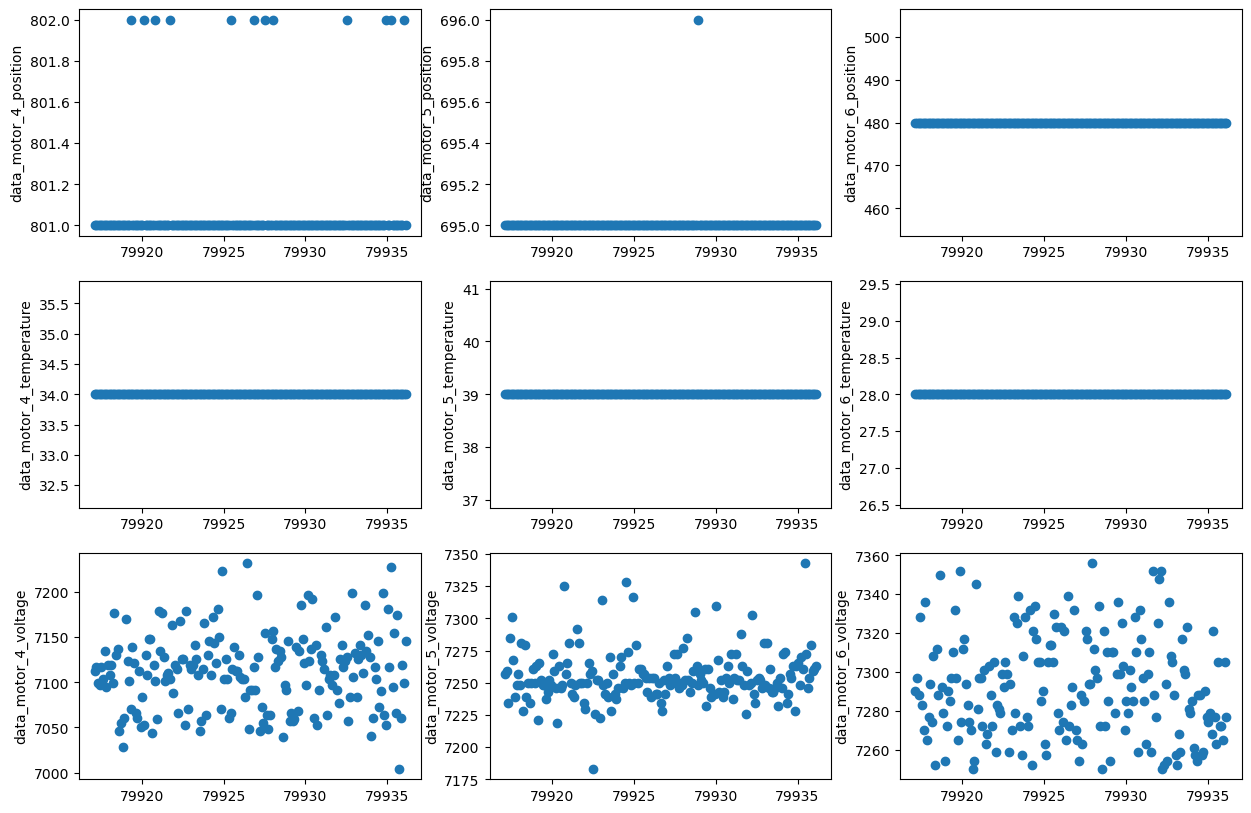

20240321_122650: 6    Try to move to pick up an item from second flo...
Name: Description, dtype: object



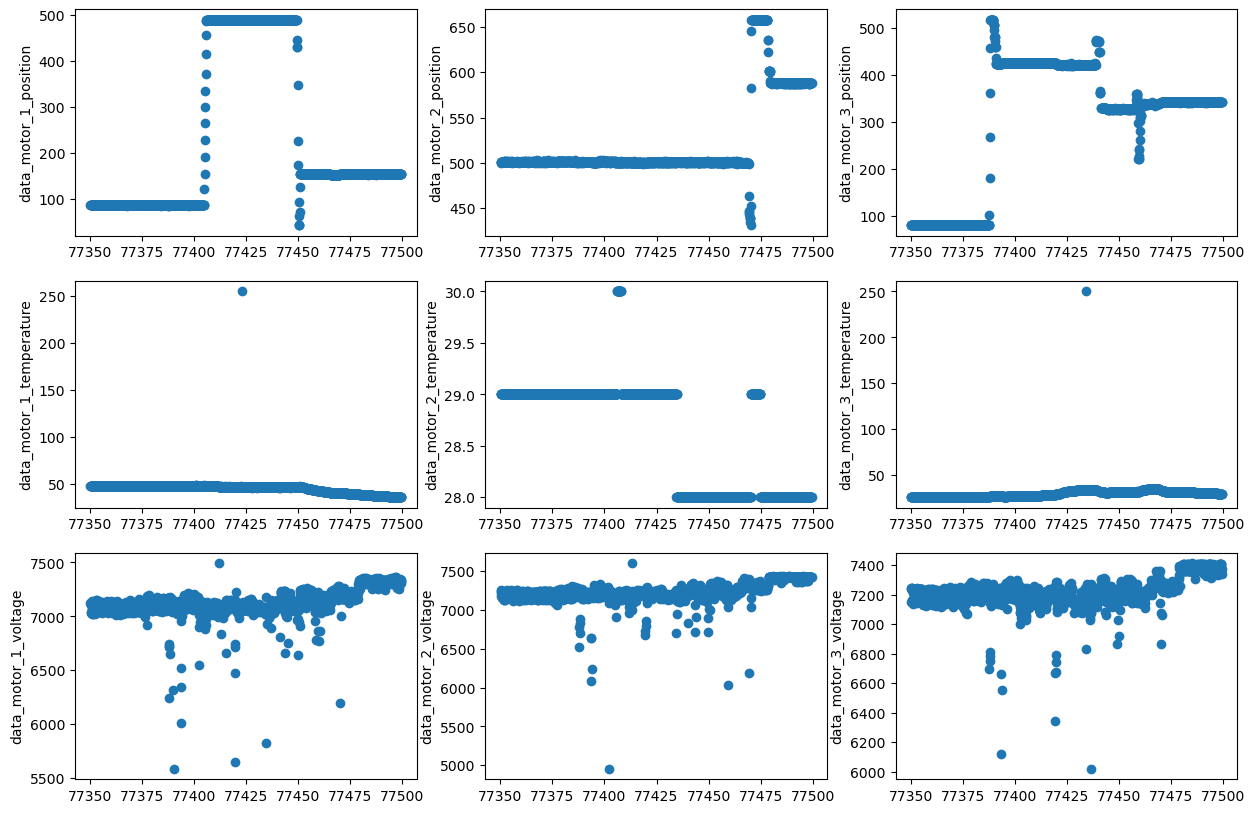

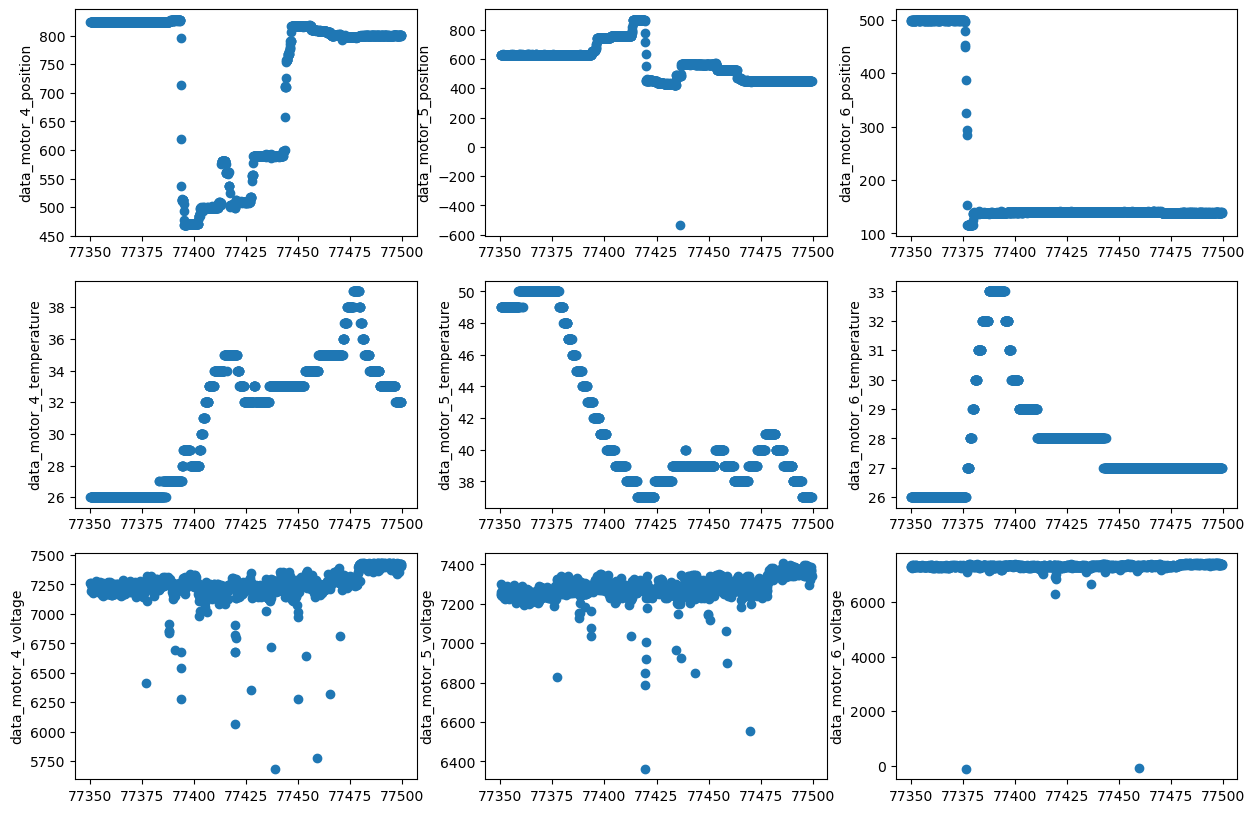

20240325_135213: 7    Robot not moving, just starting up.
Name: Description, dtype: object



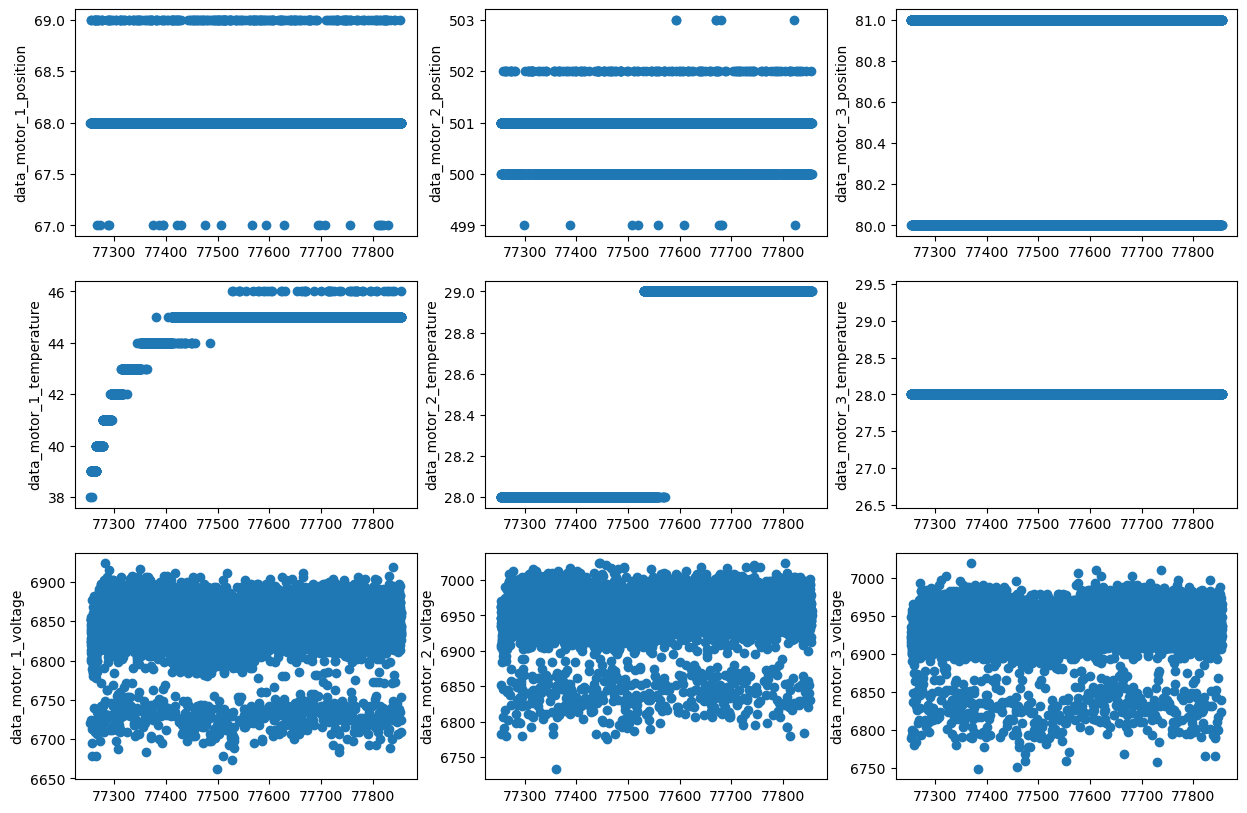

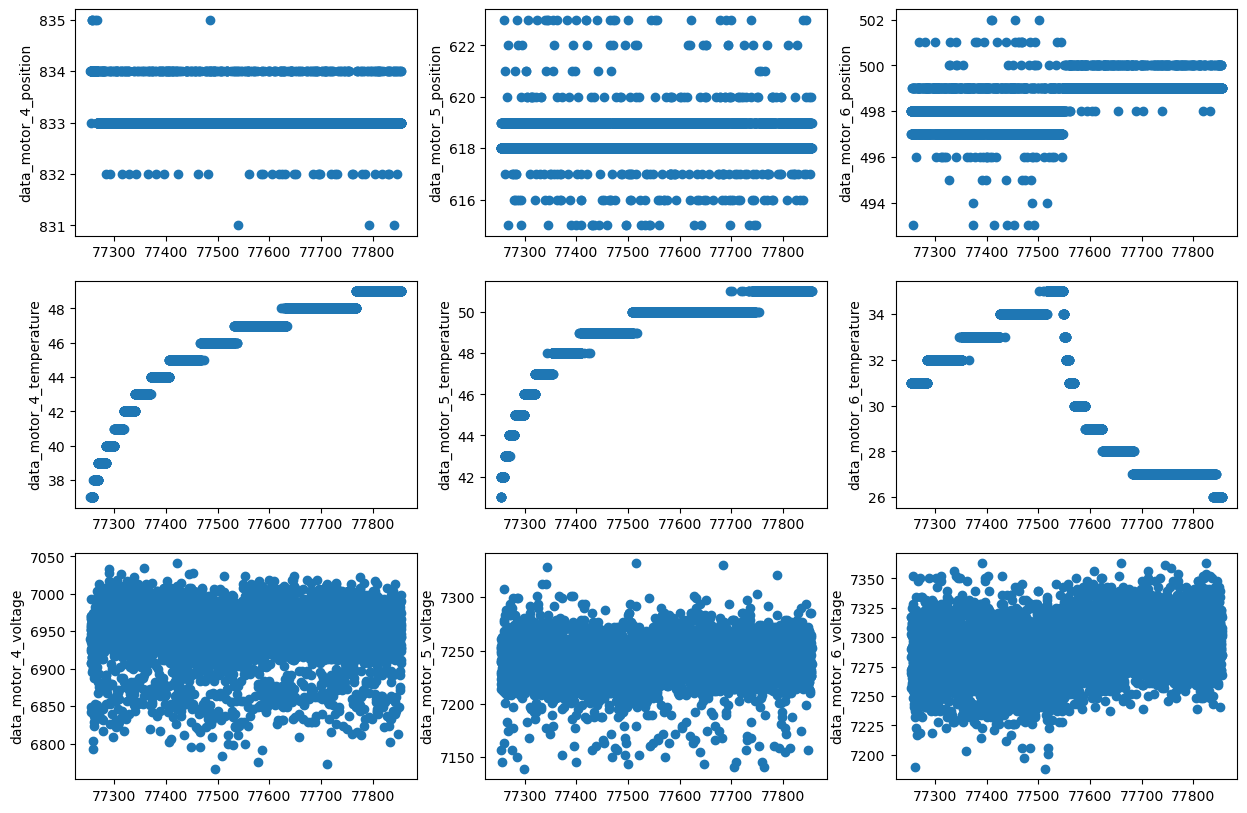

20240325_152902: 8    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



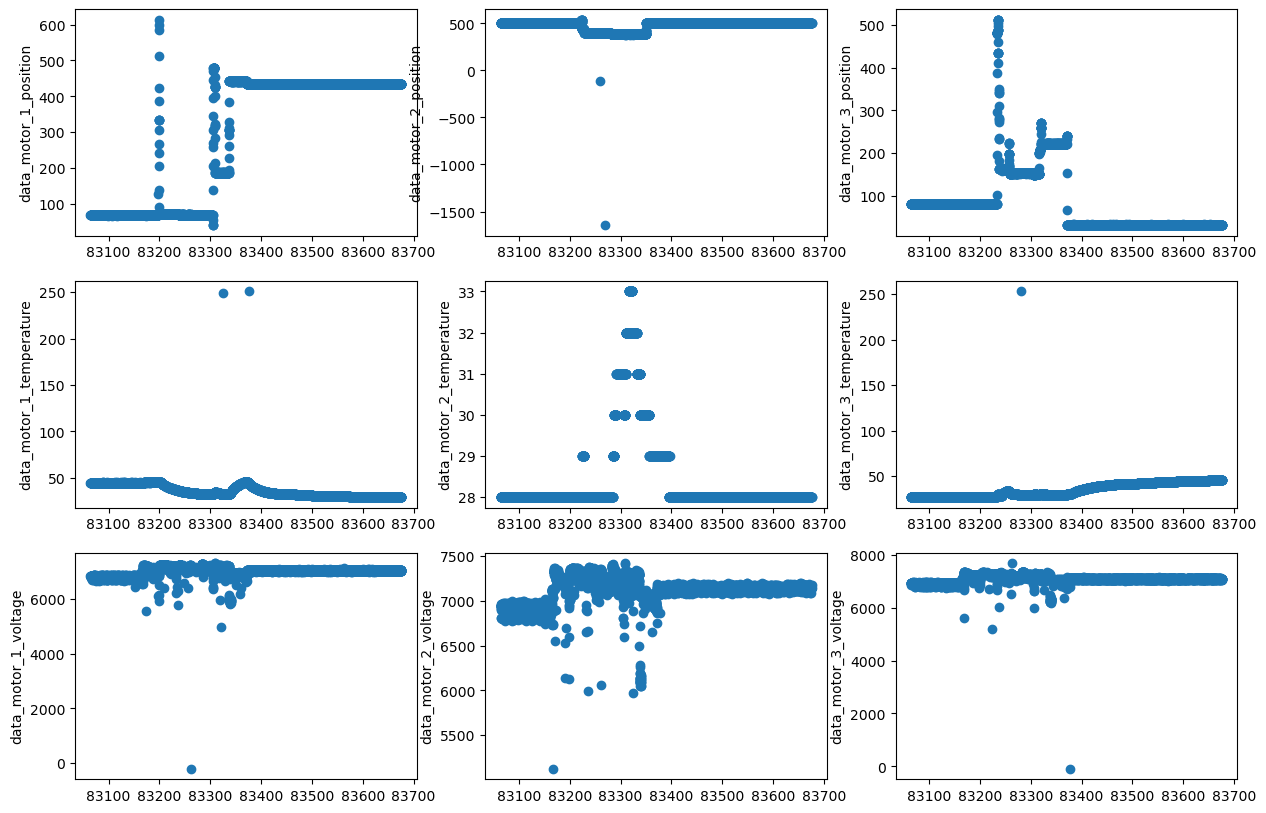

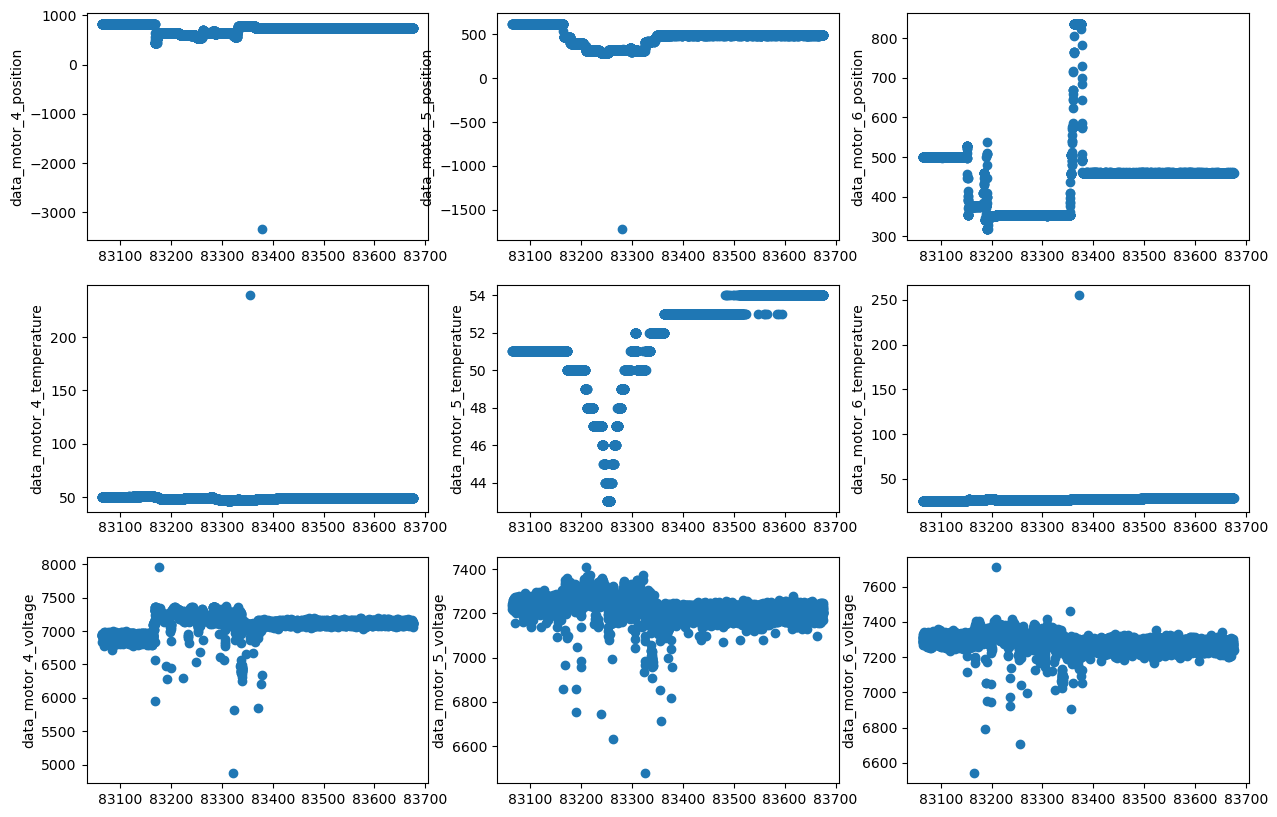

20240325_155003: 9    Starting position: Straigt. Perform two operat...
Name: Description, dtype: object



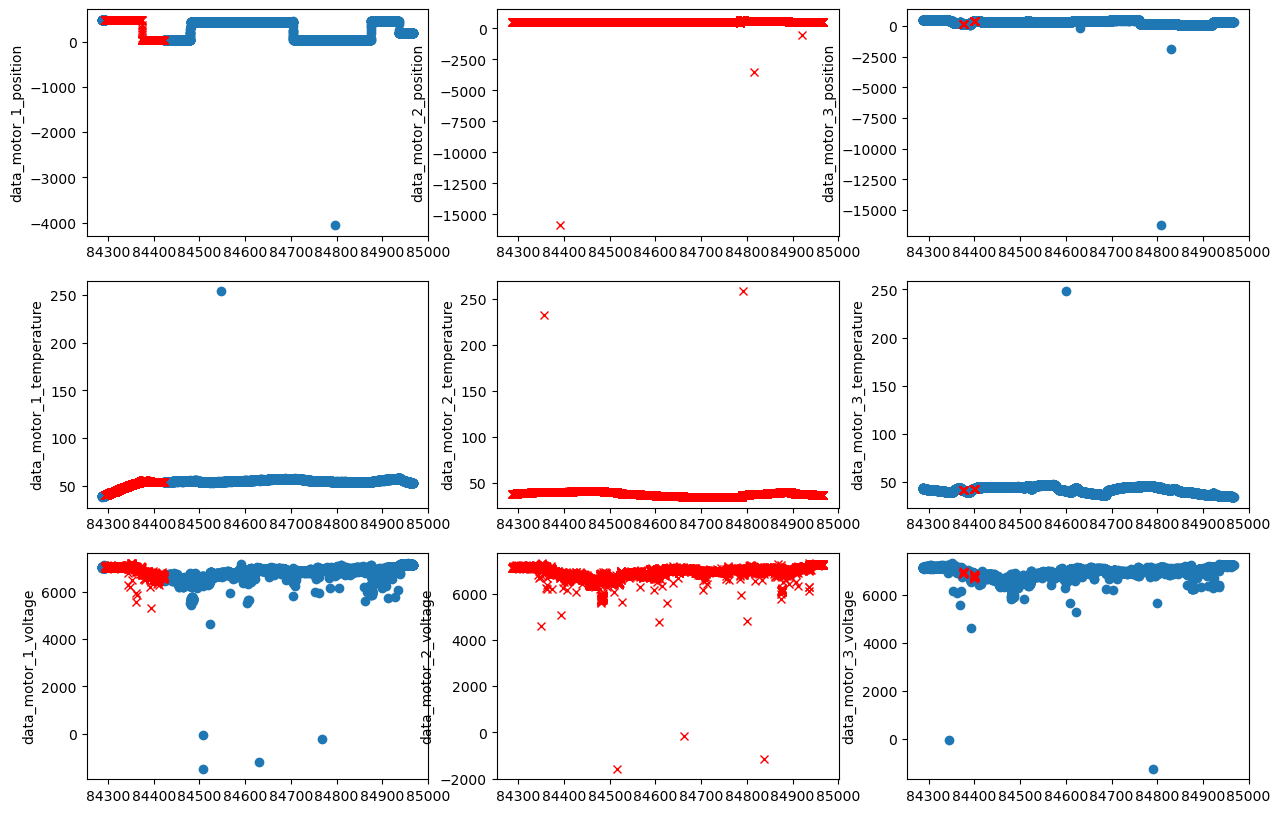

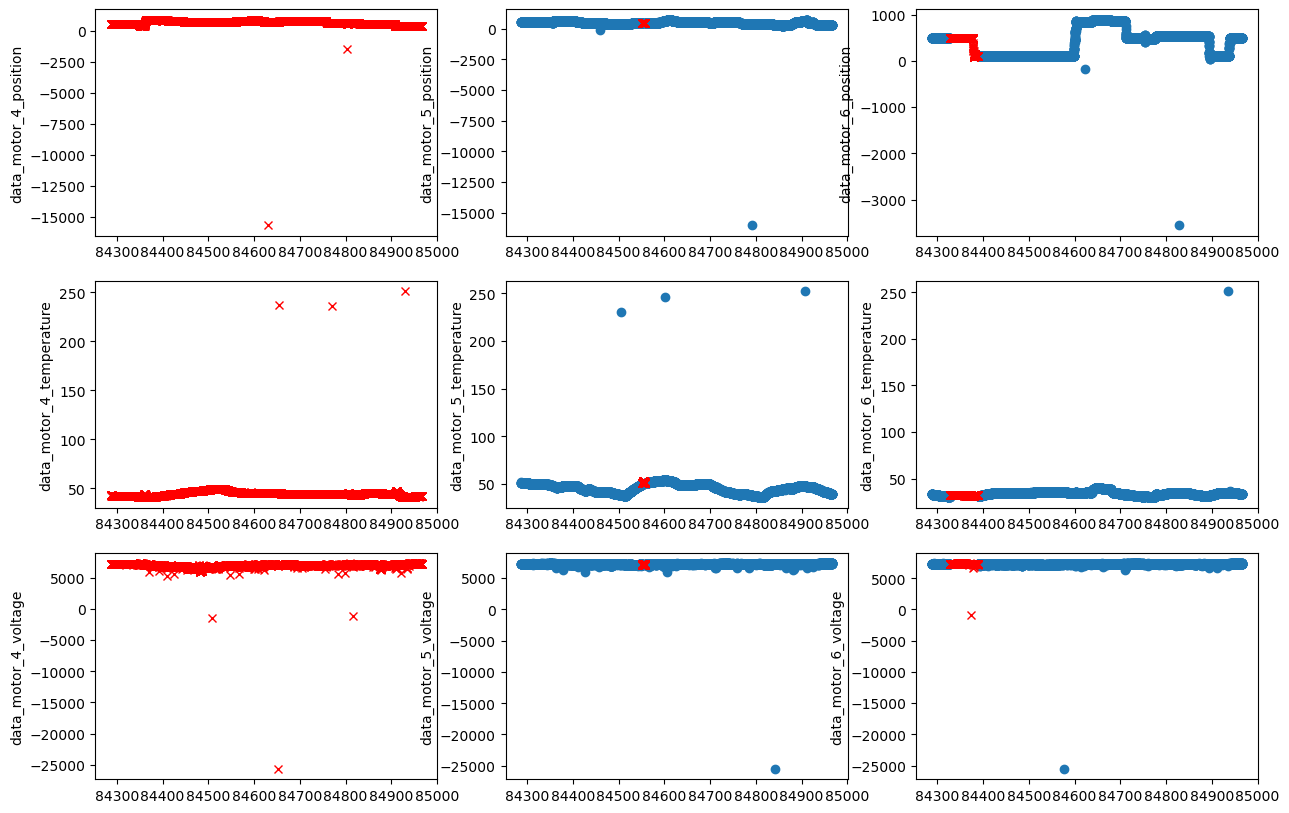

<bound method NDFrame.head of                time  data_motor_1_position  data_motor_1_temperature  \
0      76522.025433                     86                        42   
1      76522.125464                     86                        42   
2      76522.225432                     86                        42   
3      76522.325432                     86                        42   
4      76522.425451                     86                        42   
...             ...                    ...                       ...   
31130  84966.426470                    195                        53   
31131  84966.526530                    195                        53   
31132  84966.626610                    195                        53   
31133  84966.726460                    195                        53   
31134  84966.826470                    195                        53   

       data_motor_1_voltage  data_motor_1_label  data_motor_2_position  \
0                      7223    

In [4]:
base_dictionary = 'C:/Users/gioca/OneDrive/Documenti/GitHub/Group_6/projects/maintenance_industry_4_2024/dataset/training_data/'
dictionary_name = '20240105_164214'

path = base_dictionary + dictionary_name

# Read all the data
df_all_data = read_all_test_data_from_path(base_dictionary)

df_all_data.head


Please explain the structure (what does each column represent) of the resulted dataframe here.

The resulting dataframe is made of 26 columns, which are structured as follows:

- Column 1 - Time, is the column storing the time instants data are referred to. Each time the robot is started, the time instant count starts again, therefore within the dataframe the time instants aren't always increasing, but within a set of operations done in the same cycle, they are. Generally, it takes about 76 seconds (76000 ms) to start recording the data.
- Column 2 - Motor 1 Position, is the column used to store the data related to the physical position of Motor 1 at a specific time instant; 
- Column 3 - Motor 1 Temperature, is the column used to store the data related to the temperature of Motor 1 at a specific time instant;
- Column 4 - Motor 1 Voltage, is the column used to store the data related to the voltage of Motor 1 at a specific time instant;
- Column 5 - Motor 1 Label, is the column where the data for Motor 1 can take value 0 if it's working, 1 if a failure is taking place;
- Column 26 - Testing Condition, is the column where the data related to the specific activity being performed are stored.

The columns in the range [6,25] repeat the same structure of Columns 2, 3, 4, 5 but the data are related to the other Motors (2, 3, 4, 5, 6). 

The dataframe is obtained by merging the dataset of the specific motors in the single activity, therefore it provides a olistic view on the data coming from all the motors in all the activities performed by the robot. AAAAAAAAAAAAAAAAAAAAAAAAAAA

## Sub-task 2: Data visualization

Visualize the data. By examing the data, you can answer the following questions:
- Do we have a lot noise in the features? Do we need to smooth the data?
- Do we need to scale the features?
- Do we have a lot of outliers? Do we need to remove them?
- Do we have a lot of missing values? Do we need to fill them?
- In general, do you discover some patterns regarding how temperature of the motor changes?
- If we compare the normal data (label = 0) with the failures (label=1), could you see some difference in the pattern of the temperature?

**Submit your summary below:**

1) Starting from the assumption that the noise is a random variable creating a shift in the measured data compared with their real values, we could analyze the behaviors of the covariates in this perspective. From this analysis we saw that often the data have an unstable behaviors, with many covariates continuously jumping from a value to another and almost giving the impression of getting two different values at the same time instant. For example, it's possible to look at the graph of the position of motor 1 in the very first activity, ranging between 85 and 86. This same problem is also visible when the value of the covariate isn't stable, for example the temperature of motor 4 in the experiment 8 clearly has an increasing trend, but it still looks like at some time instants there are two different values. 
To overcome these problems we think that the data should be smoothed, so that we can better highlight the trends of the values. 

2) We think that we should scale the features, so that we can analyze the data giving the same weight to the different covariates independently to the scale of their values. In particular, being in presence of outliers, the standardization should work better than the normalization. By standardizing, the distribution (ie. the relative values) are considered instead of the actual values.

3) Looking at the data we noted that there are lots of outliers, often ostacolating the proper visualization of trends. In fact, the presence of these out-of-scale values doesn't allow to visualize in detail what happens to the values of a certain covariate: this is particularly clear for the position of motor 2 in the experiment 10, where a value equal to -15000 doesn't allow to see what's the trend next to the value 0. Because of this, we think it would be correct to remove them.

4) Looking at the data we didn't see any missing value. Therefore, there's no need to fill the dataframe.

5) To analyze the data of the temperatures, we started from two assumptions:
    - the presence of outliers doesn't allow to visualize perfectly the trends, as explained before;
    - the data are influenced by the presence of a noise, so small variations (about 1 degree) aren't significative.

At this point, we drafted some qualitative conclusions basing on the graphs:
    - the temperatures of all the motors increase when the robot is started, as visible from experiments 1 and 8. In the experiment 4 this trend isn't visible because the time instants aren't enough;
    - the temperature of a certain motor increases when a movement is completed by that same motor. For example, it's possible to look at the increase at time instant 77425 of the experiment 2 for motor 1. In contrast with this trend, the temperature of motor 5 tends to decrease when a movement is performed, as visible at time instant 77350 of experiment 2.
    - the temperatures of all motors decrease and stabilize when no activity is performed, as visible from experiment 3.

6) The failures data are strongly influenced by the presence of outliers in the graphs, which don't allow to visualize and understand properly what happens. Anyway, we noted that the failures occure in coincidence of an increase in the temperature.


    







## Sub-task 3 Explore the distribution of each feature through histogram and box plot.

## Sub-task 4 Use PCA to visulize the data in a 2-d plane.

Normally, before any further analysis, we try to plot all the features directly in a 2-d plane. This is because the 2-d plane is a very simple representation of the data and allows us to visually inspect the patterns of the data. A normal conclusion we can make is whether the data are linear seperable or not, i.e., if you can simply fit a straight line to seperate postitive and negative classes. However, if the data is high-dimensional, it is difficult to visualize it in a 2-d plane. In this case, we can use PCA to reduce the dimensionality of the data and then plot it in a 2-d plane.

Below is a code for performing PCA and plotting the data in a 2-d plane. What can you see from the results?

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Separate the features (X) and the target variable (y)
X = df.drop(['label', 'sequence_idx', 'time'], axis=1)
y = df['label']

# Perform PCA to reduce the dimensionality to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
plt.title('2D PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In the above analysis, we did not perform data normalization/standardization. Could you try to do that and see if the results change? You can use the follwing code for standardization:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
```

And this for normalization:

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
```

# Task 2 Data cleaning and preprocessing

## Task 1: Normalize the dataset.

Define your strategy to normalize the dataset and implement the data. Please pay attention to the difference between fit_transform(), fit(), and transform().

## Task 2: Define a strategy to remove outliers.

Explain how you remove the outliers and implement your approach here.

## Task 3: Define a strategy to smooth the data.

Explain how do you smooth the data and implement your approach here.

# Task 3 Feature engineering

## Task 1: Use violin plot to explore the significance of each feature.

## Task 2: Use correlation coefficient matrix to explore the correlation among the features.

## Conclusion of feature engineering

**Write your conclusion of feature engineering here.** For example, which features are most relevant? Which features are not relevant? Which features are redundant? Which features are irrelevant? Eventually, what are your decisions regarding which features to be used?


